# Домашнее задание 5

## Задача 0.

1. Сгенерируйте NumPy-массив чисел от 0 до 10000 (включительно).
2. Найдите сумму всех чисел, кроме тех, которые делятся на 3 или на 8 (в одну строку).

In [1]:
import numpy as np
arr = np.linspace(0, 10000, 101)
res = sum([x for x in arr if (x % 3 != 0 and x % 8 != 0)])
res

163300.0

## Задача 1. Интерполяция

Уравнение движения маятника $y = A \cos{(\omega t + \varphi)}$

Есть измерянные данные (с шумом). 

Необходимо найти амплитуду, частоту и начальную фазу.

In [2]:
import numpy as np

In [3]:
t_data = np.linspace(0, 10, 30)
y_noisy = np.array([ 4.10465607,  1.69794745, -2.32313143, -4.07624211, -1.66543449,  2.1145771,
  3.70880127,  2.16805654, -2.04181849, -4.07636456, -1.83702696,  1.95313412,
  4.18439283,  1.95123149, -1.90018249, -3.88197156, -2.25644626,  1.58158325,
  4.08242668,  2.51835565, -1.27829727, -4.0866171, -2.30645672, 1.08053092,
  4.07574853,  2.79301888, -0.89299698, -3.91278811, -3.00365192,  0.792355  ])

𝐴 = 0.4000098532865809, 𝜔 = 0.8709503608227546, 𝜑 = 0.6892818035270615


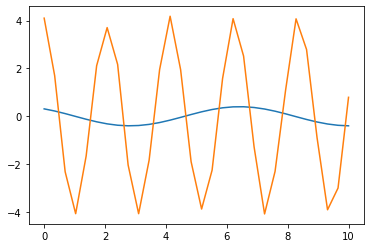

In [4]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def f(t, a, w, phi):
    return a * np.cos(w * t + phi)

popt, pcov = curve_fit(f, t_data, y_noisy)
res_a, res_w, res_phi = popt
y = f(t_data, res_a, res_w, res_phi)
plt.plot(t_data, y)
plt.plot(t_data, y_noisy)
#plt.scatter(t_data, y_noisy, marker='o', c='blue')
print(f'𝐴 = {res_a}, 𝜔 = {res_w}, 𝜑 = {res_phi}')
plt.show()

## Задача 2. Система Лоренца


$
\Large
\begin{cases}
   \dot{x} = \sigma (y - x), 
   \\
   \dot{y} = x (\rho - z) - y,
   \\
   \dot{z} = x y - \beta z
 \end{cases}\normalsize
 $
<br>

В наших вычислениях используем стандартные значения $\sigma=10, \rho=28, \beta=2.667$

<br>

1. Построить хаотический аттрактор. Начальные данные $-$ $(0., 1., 1.05)$, первые 5000 точек решения отбросить ("переходный процесс"). Потом отрисовать траекторию, сформированную 10000 точками. Шаг по времени $\Delta t = 0.01$;
2. Аннотировать график и нанести начальные данные.

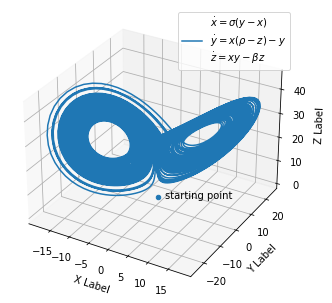

In [5]:
from scipy.integrate import odeint
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D

def model(u, t):
    r = 28
    b = 2.667
    s = 10
    x = u[0]
    y = u[1]
    z = u[2]
    dxdt = s * (y - x)
    dydt = x * (r - z) - y
    dzdt = x * y - b * z
    return [dxdt, dydt, dzdt]

dt = 0.01
u0 = [0., 1., 1.05] 
t = np.arange(0, 15000) * dt

u = odeint(model, u0, t)

x = u[5000:, 0]
y = u[5000:, 1]
z = u[5000:, 2]
fig = figure()
ax = Axes3D(fig)
import re
ax.plot(x,y,z,
        label=r'$\dot{x} = \sigma (y - x)$' + '\n' +
        r'$\dot{y} = x (\rho - z) - y$' +'\n' +
        r'$\dot{z} = x y - \beta z$')
ax.scatter(xs=0, ys=1, zs=1.05)
ax.text(2, 1, 1.05, 'starting point')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.legend()
plt.show()

## Задача 3. 

Пусть $y = {\rm e}^{-\frac{x}{10}} \sin{x}$ и рассмотрим $10^4$ равноудаленных точек на интервале $[0, 10]$.

1. Постройте график зависимости $y$ от $x$;
2. Посчитайте среднее и среднеквадратическое отклонение $y$ при значениях $x \in [4, 7]$;
3. Для $x \in [4, 7]$ найдите значение $y_m$ такое, что $70\%$ значений $y$ меньше $y_m$. Обозначьте пунктирной прямой соответствующее значение на графике;
4. Найдите $y'(x)$ и постройте соответствующий график; 
5. Найдите экстремумы $y$ (т.е. решите $y'(x) = 0$). Нанесите найденные точки на график.

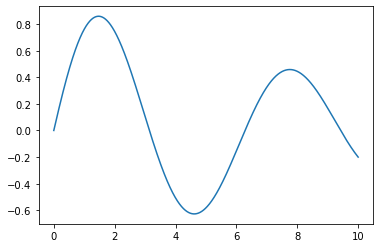

In [6]:
def f(x):
    return np.exp(-x/10) * np.sin(x)

x_data = np.linspace(0, 10, 10**4)
y_data = f(x_data)
plt.plot(x_data, y_data)

In [7]:
x_data2 = np.array([x for x in x_data if (x >= 4) and (x <= 7)])
print(np.mean(f(x_data2)) ,np.std(f(x_data2)))

-0.2956362863932012 0.3144532369395424


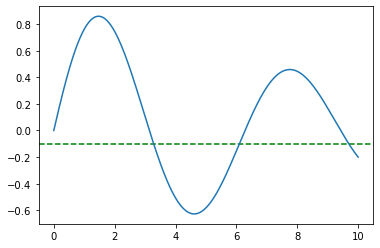

In [8]:
y_m = np.sort(f(x_data2))[int(len(x_data2) * 0.7)]
plt.axhline(y=y_m, color='g', linestyle='--')
#plt.axvline(x=4, color='r', linestyle='-')
#plt.axvline(x=7, color='r', linestyle='-')
plt.plot(x_data, y_data)
plt.show()

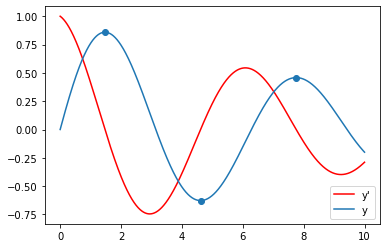

In [9]:
def f2(x):
    return 1/10 * np.exp(-x/10) * (10*np.cos(x) - np.sin(x))

dy = np.gradient(f(x_data), x_data)
plt.plot(x_data, dy, color='r', label='y\'')
plt.plot(x_data, y_data, label='y')
plt.legend(loc='lower right')

ind = np.where(abs(dy - 0) <= 0.22e-3)[0]
plt.scatter(x_data[ind], y_data[ind])

## Задача 4

Постройте <a href="https://en.wikipedia.org/wiki/Rose_(mathematics)">розочку</a>, заданную уравнением

$r(\theta) = 1 + \frac{3}{4}\sin{3\theta}$ при $0 \leq \theta \leq 2 \pi$.

1. Найдите вектора $x$ и $y$ и постройте соответствующий график (добавьте легенды, аннотации и т.п.);
2. Найдите площадь, ограниченную фигурой, из формулы $S = \frac{1}{2} \int_{0}^{2\pi} r^2 d\theta$;
3. Найдите длину кривой из формулы $L = \int_{0}^{2\pi} \sqrt{r^2 + (\frac{dr}{d\theta})^2} d\theta$;

In [10]:
from math import pi

def r(teta):
    return 1 + 3/4 * np.sin(3*teta)

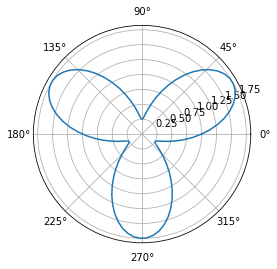

In [11]:
teta_data = np.linspace(0, 2 * pi, 100)
plt.polar(teta_data,r(teta_data))

Text(1, -0.5, 'добавьте легенды, аннотации и т.п.')

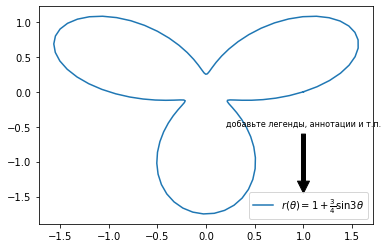

In [12]:
def x(r, teta):
    return r * np.cos(teta)

def y(r, teta):
    return r * np.sin(teta)

plt.plot(x(r(teta_data), teta_data), y(r(teta_data), teta_data), label=r'$r(\theta) = 1 + \frac{3}{4}\sin{3\theta}$' )
plt.legend(loc='lower right')
plt.annotate('добавьте легенды, аннотации и т.п.', xy=(1, -1.5), xytext=(1, -0.5),
            arrowprops=dict(facecolor='black', shrink=0.05),  horizontalalignment='center', fontsize=8)

In [13]:
from scipy.integrate import quad

def f(t):
    return (1 + 3/4 * np.sin(3 * t)) ** 2

s = 1/2 * quad(f, 0, 2 * pi)[0]
s

4.025165587411922

In [14]:
def g(t):
    return np.sqrt((f(t) + (9/4 * np.cos(3 * t)) ** 2))

l = quad(g, 0, 2 * pi)[0]
l

11.624988518750428

## Задача 5: Оптимизация

$x_{4}(x_{1} - x_{2} + x_{3}^2) + x_{3}(x_{1} - x_{4}) \rightarrow \inf_{x}$ при ограничениях

$
\begin{align}
x_{1}x_{2}x_{3}x_{4} &\geq 25 \\
x_{1}^2 + x_{2}^2 + x_{3}^2 + x_{4}^2 &= 40 \\
1 \leq x_{1}, x_{2}, x_{3}, x_{4} &\leq 5 \\
x_{0} &= (2, 4, 4, 2)
\end{align}
$

In [15]:
from scipy.optimize import minimize

f = lambda x: x[3] * (x[0] - x[1] + x[2]**2) + x[2] * (x[0] - x[3])
cons = ({'type': 'ineq', 'fun': lambda x: x[0] * x[1] * x[2] * x[3] - 25},
       {'type': 'eq', 'fun': lambda x: x[0]**2 + x[1]**2 + x[2]**2 + x[3]**2 - 40})
bounds = ((1, 5), (1, 5), (1, 5), (1, 5))
result = minimize(f, (2, 4, 4, 2), bounds=bounds, constraints=cons) 
result

     fun: -11.736434746410458
     jac: array([ 5.16687751, -4.06674135,  6.10800636, -3.21783245])
 message: 'Optimization terminated successfully'
    nfev: 67
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([1.22680971, 4.55480551, 1.10013609, 4.06674135])